In [79]:
import pandas as pd
from scipy import stats
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##CO Data

In [114]:
file_path = '/content/drive/My Drive/Colab Notebooks/co_milan.csv'
co_data = pd.read_csv(file_path)

In [115]:
co_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
0,IT/SPO-IT0467A_00010_100,10,2006-01-01 00:00:00,1.5,mg.m-3
1,IT/SPO-IT0467A_00010_100,10,2006-01-01 01:00:00,1.4,mg.m-3
2,IT/SPO-IT0467A_00010_100,10,2006-01-01 02:00:00,1.6,mg.m-3
3,IT/SPO-IT0467A_00010_100,10,2006-01-01 03:00:00,1.7,mg.m-3
4,IT/SPO-IT0467A_00010_100,10,2006-01-01 04:00:00,1.2,mg.m-3


In [116]:
# Convert the Start column to datetime
co_data['Start'] = pd.to_datetime(co_data['Start'])

# Filter the data for the specified sampling point and date range
filtered_co_data = co_data[
    (co_data['Samplingpoint'] == 'IT/SPO-IT0770A_00010_500') &
    (co_data['Start'] >= '2004-03-01') &
    (co_data['Start'] <= '2005-04-30')
]

# Display the filtered data
filtered_co_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
170880,IT/SPO-IT0770A_00010_500,10,2004-03-01 00:00:00,1.7,mg.m-3
170881,IT/SPO-IT0770A_00010_500,10,2004-03-01 01:00:00,1.5,mg.m-3
170882,IT/SPO-IT0770A_00010_500,10,2004-03-01 02:00:00,1.5,mg.m-3
170883,IT/SPO-IT0770A_00010_500,10,2004-03-01 03:00:00,1.4,mg.m-3
170884,IT/SPO-IT0770A_00010_500,10,2004-03-01 04:00:00,1.4,mg.m-3


In [117]:
nan_indices = filtered_co_data[filtered_co_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


In [118]:
# Calculate the 8-hour rolling average
filtered_co_data = filtered_co_data.set_index('Start')
filtered_co_data['8hr_avg'] = filtered_co_data['Value'].rolling(window=8, min_periods=1).mean()

# Reset the index to have the 'Start' column back
filtered_co_data = filtered_co_data.reset_index()

# Display the first few rows of the data with the 8-hour rolling average
filtered_co_data.head()

,Start,Samplingpoint,Pollutant,Value,Unit,8hr_avg
0,2004-03-01 00:00:00,IT/SPO-IT0770A_00010_500,10,1.7,mg.m-3,1.700000
1,2004-03-01 01:00:00,IT/SPO-IT0770A_00010_500,10,1.5,mg.m-3,1.600000
2,2004-03-01 02:00:00,IT/SPO-IT0770A_00010_500,10,1.5,mg.m-3,1.566667
3,2004-03-01 03:00:00,IT/SPO-IT0770A_00010_500,10,1.4,mg.m-3,1.525000
4,2004-03-01 04:00:00,IT/SPO-IT0770A_00010_500,10,1.4,mg.m-3,1.500000


##NO2 Data

In [119]:
no2_file_path = '/content/drive/My Drive/Colab Notebooks/no2_milan.csv'
no2_data = pd.read_csv(no2_file_path)

# Display the first few rows of the NO2 data to understand its structure
no2_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
0,IT/SPO-IT0466A_00008_100,8,2006-01-01 00:00:00,65.0,ug.m-3
1,IT/SPO-IT0466A_00008_100,8,2006-01-01 01:00:00,65.0,ug.m-3
2,IT/SPO-IT0466A_00008_100,8,2006-01-01 02:00:00,71.0,ug.m-3
3,IT/SPO-IT0466A_00008_100,8,2006-01-01 03:00:00,74.0,ug.m-3
4,IT/SPO-IT0466A_00008_100,8,2006-01-01 04:00:00,74.0,ug.m-3


In [121]:
nan_indices = filtered_no2_data[filtered_no2_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


In [120]:
# Filter the NO2 data for a different sampling point within the specified date range
alternative_sampling_point = 'IT/SPO-IT0770A_00008_500'
filtered_no2_data = no2_data[
    (no2_data['Samplingpoint'] == alternative_sampling_point) &
    (no2_data['Start'] >= '2004-03-01') &
    (no2_data['Start'] <= '2005-04-30')
]

# Display the filtered NO2 data
filtered_no2_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
170784,IT/SPO-IT0770A_00008_500,8,2004-03-01 00:00:00,63.0,ug.m-3
170785,IT/SPO-IT0770A_00008_500,8,2004-03-01 01:00:00,55.0,ug.m-3
170786,IT/SPO-IT0770A_00008_500,8,2004-03-01 02:00:00,46.0,ug.m-3
170787,IT/SPO-IT0770A_00008_500,8,2004-03-01 03:00:00,36.0,ug.m-3
170788,IT/SPO-IT0770A_00008_500,8,2004-03-01 04:00:00,39.0,ug.m-3


##03 Data

In [122]:
o3_file_path = '/content/drive/My Drive/Colab Notebooks/O3_Milan.csv'
o3_data = pd.read_csv(o3_file_path)

# Display the first few rows of the O3 data to understand its structure
o3_data.head()

,Unnamed: 0,Samplingpoint,Pollutant,Start,Value,Unit
0,0,IT/SPO-IT0522A_00007_500,7,2003-01-01 00:00:00,0.0,ug.m-3
1,1,IT/SPO-IT0522A_00007_500,7,2003-01-01 01:00:00,8.0,ug.m-3
2,2,IT/SPO-IT0522A_00007_500,7,2003-01-01 02:00:00,8.0,ug.m-3
3,3,IT/SPO-IT0522A_00007_500,7,2003-01-01 03:00:00,8.0,ug.m-3
4,4,IT/SPO-IT0522A_00007_500,7,2003-01-01 04:00:00,8.0,ug.m-3


In [123]:
# Filter the O3 data for the selected sampling point within the specified date range
o3_sampling_point = 'IT/SPO-IT0770A_00007_500'
filtered_o3_data = o3_data[
    (o3_data['Samplingpoint'] == o3_sampling_point) &
    (o3_data['Start'] >= '2004-03-01') &
    (o3_data['Start'] <= '2005-04-30')
]

# Calculate the 8-hour rolling average
filtered_o3_data = filtered_o3_data.set_index('Start')
filtered_o3_data['8hr_avg'] = filtered_o3_data['Value'].rolling(window=8, min_periods=1).mean()

# Reset the index to have the 'Start' column back
filtered_o3_data = filtered_o3_data.reset_index()

# Display the first few rows of the data with the 8-hour rolling average
filtered_o3_data.tail()

,Start,Unnamed: 0,Samplingpoint,Pollutant,Value,Unit,8hr_avg
2755,2005-04-29 19:00:00,28555,IT/SPO-IT0770A_00007_500,7,91.0,ug.m-3,89.875
2756,2005-04-29 20:00:00,28556,IT/SPO-IT0770A_00007_500,7,83.0,ug.m-3,92.500
2757,2005-04-29 21:00:00,28557,IT/SPO-IT0770A_00007_500,7,69.0,ug.m-3,92.875
2758,2005-04-29 22:00:00,28558,IT/SPO-IT0770A_00007_500,7,57.0,ug.m-3,88.750
2759,2005-04-29 23:00:00,28559,IT/SPO-IT0770A_00007_500,7,33.0,ug.m-3,80.250


In [124]:
nan_indices = filtered_o3_data[filtered_o3_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


##PM10 Data

In [18]:
# Load the PM10 data file
pm10_file_path = '/content/drive/My Drive/Colab Notebooks/PM10_milan.csv'
pm10_data = pd.read_csv(pm10_file_path)

# Display the first few rows of the PM10 data to understand its structure
pm10_data.head()


,Unnamed: 0,Samplingpoint,Pollutant,Start,Value,Unit
0,1795,IT/SPO-IT0466A_00005_500,5,2003-01-01,50.0,ug.m-3
1,1796,IT/SPO-IT0466A_00005_500,5,2003-01-02,58.0,ug.m-3
2,1797,IT/SPO-IT0466A_00005_500,5,2003-01-03,89.0,ug.m-3
3,1798,IT/SPO-IT0466A_00005_500,5,2003-01-04,65.0,ug.m-3
4,1799,IT/SPO-IT0466A_00005_500,5,2003-01-05,22.0,ug.m-3


In [19]:
# Filter the PM10 data for the selected sampling point within the specified date range
pm10_sampling_point = 'IT/SPO-IT0770A_00005_500'
filtered_pm10_data = pm10_data[
    (pm10_data['Samplingpoint'] == pm10_sampling_point) &
    (pm10_data['Start'] >= '2004-03-01') &
    (pm10_data['Start'] <= '2005-04-30')
]

# Calculate the 24-hour rolling average
filtered_pm10_data = filtered_pm10_data.set_index('Start')
filtered_pm10_data['24hr_avg'] = filtered_pm10_data['Value'].rolling(window=24, min_periods=1).mean()

# Reset the index to have the 'Start' column back
filtered_pm10_data = filtered_pm10_data.reset_index()

# Display the first few rows of the data with the 24-hour rolling average
filtered_pm10_data.head()

,Start,Unnamed: 0,Samplingpoint,Pollutant,Value,Unit,24hr_avg
0,2004-03-01,14937,IT/SPO-IT0770A_00005_500,5,67.0,ug.m-3,67.000000
1,2004-03-02,14938,IT/SPO-IT0770A_00005_500,5,88.0,ug.m-3,77.500000
2,2004-03-03,14939,IT/SPO-IT0770A_00005_500,5,101.0,ug.m-3,85.333333
3,2004-03-04,14940,IT/SPO-IT0770A_00005_500,5,105.0,ug.m-3,90.250000
4,2004-03-05,14941,IT/SPO-IT0770A_00005_500,5,66.0,ug.m-3,85.400000


In [125]:
nan_indices = filtered_pm10_data[filtered_pm10_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


##PM2.5 Data

In [20]:
# Load the PM2.5 data file
pm25_file_path = '/content/drive/My Drive/Colab Notebooks/pm25_milan.csv'
pm25_data = pd.read_csv(pm25_file_path)

# Display the first few rows of the PM2.5 data to understand its structure
pm25_data.head()
pm25_data = pd.read_csv(pm25_file_path)

# Display the first few rows of the PM2.5 data to understand its structure
pm25_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
0,IT/SPO-IT0466A_06001_500,6001,2006-01-01,79.0,NaN
1,IT/SPO-IT0466A_06001_500,6001,2006-01-02,113.0,NaN
2,IT/SPO-IT0466A_06001_500,6001,2006-01-03,116.0,NaN
3,IT/SPO-IT0466A_06001_500,6001,2006-01-04,80.0,NaN
4,IT/SPO-IT0466A_06001_500,6001,2006-01-05,56.0,NaN


In [21]:
# Filter the PM2.5 data for the selected sampling point within the specified date range
pm25_sampling_point = 'IT/SPO-IT0467A_06001_500'
filtered_pm25_data = pm25_data[
    (pm25_data['Samplingpoint'] == pm25_sampling_point) &
    (pm25_data['Start'] >= '2004-03-01') &
    (pm25_data['Start'] <= '2005-04-30')
]

# Calculate the 24-hour rolling average
filtered_pm25_data = filtered_pm25_data.set_index('Start')
filtered_pm25_data['24hr_avg'] = filtered_pm25_data['Value'].rolling(window=24, min_periods=1).mean()

# Reset the index to have the 'Start' column back
filtered_pm25_data = filtered_pm25_data.reset_index()

# Display the first few rows of the data with the 24-hour rolling average
filtered_pm25_data.head()

,Start,Samplingpoint,Pollutant,Value,Unit,24hr_avg
0,2004-03-01,IT/SPO-IT0467A_06001_500,6001,21.0,NaN,21.000000
1,2004-03-02,IT/SPO-IT0467A_06001_500,6001,43.0,NaN,32.000000
2,2004-03-03,IT/SPO-IT0467A_06001_500,6001,40.0,NaN,34.666667
3,2004-03-04,IT/SPO-IT0467A_06001_500,6001,46.0,NaN,37.500000
4,2004-03-05,IT/SPO-IT0467A_06001_500,6001,21.0,NaN,34.200000


In [126]:
nan_indices = filtered_pm25_data[filtered_pm25_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


##SO2 Data

In [22]:
# Load the SO2 data file
so2_file_path = '/content/drive/My Drive/Colab Notebooks/so2_milan.csv'
so2_data = pd.read_csv(so2_file_path)

# Display the first few rows of the SO2 data to understand its structure
so2_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
0,IT/SPO-IT0466A_00001_100,1,2006-01-01 00:00:00,4.0,ug.m-3
1,IT/SPO-IT0466A_00001_100,1,2006-01-01 01:00:00,0.0,ug.m-3
2,IT/SPO-IT0466A_00001_100,1,2006-01-01 02:00:00,5.0,ug.m-3
3,IT/SPO-IT0466A_00001_100,1,2006-01-01 03:00:00,5.0,ug.m-3
4,IT/SPO-IT0466A_00001_100,1,2006-01-01 04:00:00,5.0,ug.m-3


In [23]:
# Filter the SO2 data for the selected sampling point within the specified date range
so2_sampling_point = 'IT/SPO-IT0466A_00001_500'
filtered_so2_data = so2_data[
    (so2_data['Samplingpoint'] == so2_sampling_point) &
    (so2_data['Start'] >= '2004-03-01') &
    (so2_data['Start'] <= '2005-04-30')
]

# Display the filtered SO2 data
filtered_so2_data.head()

,Samplingpoint,Pollutant,Start,Value,Unit
17976,IT/SPO-IT0466A_00001_500,1,2004-03-01 00:00:00,6.0,ug.m-3
17977,IT/SPO-IT0466A_00001_500,1,2004-03-01 01:00:00,0.0,ug.m-3
17978,IT/SPO-IT0466A_00001_500,1,2004-03-01 02:00:00,5.0,ug.m-3
17979,IT/SPO-IT0466A_00001_500,1,2004-03-01 03:00:00,0.0,ug.m-3
17980,IT/SPO-IT0466A_00001_500,1,2004-03-01 04:00:00,0.0,ug.m-3


In [128]:
nan_indices = filtered_so2_data[filtered_so2_data['Value'].isna()].index
print(nan_indices)

#No Values are NaN

Index([], dtype='int64')


##AQI Given the Above Data

In [129]:
# Function to calculate AQI for a given value using breakpoints
def calculate_aqi(value, breakpoints):
    for (C_low, C_high, I_low, I_high) in breakpoints:
        if C_low <= value <= C_high:
            aqi = ((I_high - I_low) / (C_high - C_low)) * (value - C_low) + I_low
            return aqi
    return None


In [130]:
#break points
no2_breakpoints = [
    (0, 53, 0, 50),
    (54, 100, 51, 100),
    (101, 360, 101, 150),
    (361, 649, 151, 200),
    (650, 1249, 201, 300),
    (1250, 1649, 301, 400),
    (1650, 2049, 401, 500)
]

o3_breakpoints = [
    (0.000, 0.054, 0, 50),
    (0.055, 0.070, 51, 100),
    (0.071, 0.085, 101, 150),
    (0.086, 0.105, 151, 200),
    (0.106, 0.200, 201, 300),
    (0.201, 0.604, 301, 500)
]

pm10_breakpoints = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 504, 301, 400),
    (505, 604, 401, 500)
]

pm25_breakpoints = [
    (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 350.4, 301, 400),
    (350.5, 500.4, 401, 500)
]

so2_breakpoints = [
    (0, 35, 0, 50),
    (36, 75, 51, 100),
    (76, 185, 101, 150),
    (186, 304, 151, 200),
    (305, 604, 201, 300),
    (605, 804, 301, 400),
    (805, 1004, 401, 500)
]

co_breakpoints = [
    (0.0, 4.4, 0, 50),
    (4.5, 9.4, 51, 100),
    (9.5, 12.4, 101, 150),
    (12.5, 15.4, 151, 200),
    (15.5, 30.4, 201, 300),
    (30.5, 40.4, 301, 400),
    (40.5, 50.4, 401, 500)
]


In [131]:
# Calculate AQI for NO2
filtered_no2_data['AQI'] = filtered_no2_data['Value'].apply(lambda x: calculate_aqi(x, no2_breakpoints))

# Calculate AQI for PM10
filtered_pm10_data['AQI'] = filtered_pm10_data['24hr_avg'].apply(lambda x: calculate_aqi(x, pm10_breakpoints))

# Calculate AQI for PM2.5
filtered_pm25_data['AQI'] = filtered_pm25_data['24hr_avg'].apply(lambda x: calculate_aqi(x, pm25_breakpoints))

# Calculate AQI for SO2
filtered_so2_data['AQI'] = filtered_so2_data['Value'].apply(lambda x: calculate_aqi(x, so2_breakpoints))

filtered_co_data['AQI'] = filtered_co_data['8hr_avg'].apply(lambda x: calculate_aqi(x, co_breakpoints))



<ipython-input-131-f7b39c5e3c3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_no2_data['AQI'] = filtered_no2_data['Value'].apply(lambda x: calculate_aqi(x, no2_breakpoints))
<ipython-input-131-f7b39c5e3c3d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_so2_data['AQI'] = filtered_so2_data['Value'].apply(lambda x: calculate_aqi(x, so2_breakpoints))


In [132]:
# Convert O3 values from µg/m³ to ppm
filtered_o3_data['Value_ppm'] = filtered_o3_data['8hr_avg'] * 0.0005

# Recalculate AQI for O3 using the converted values
filtered_o3_data['AQI_O3'] = filtered_o3_data['Value_ppm'].apply(lambda x: calculate_aqi(x, o3_breakpoints))

# Display the first few rows of the corrected O3 data
filtered_o3_data.head()

,Start,Unnamed: 0,Samplingpoint,Pollutant,Value,Unit,8hr_avg,Value_ppm,AQI_O3
0,2005-01-01 00:00:00,25800,IT/SPO-IT0770A_00007_500,7,7.0,ug.m-3,7.000000,0.003500,3.240741
1,2005-01-01 01:00:00,25801,IT/SPO-IT0770A_00007_500,7,7.0,ug.m-3,7.000000,0.003500,3.240741
2,2005-01-01 02:00:00,25802,IT/SPO-IT0770A_00007_500,7,8.0,ug.m-3,7.333333,0.003667,3.395062
3,2005-01-01 03:00:00,25803,IT/SPO-IT0770A_00007_500,7,7.0,ug.m-3,7.250000,0.003625,3.356481
4,2005-01-01 04:00:00,25804,IT/SPO-IT0770A_00007_500,7,7.0,ug.m-3,7.200000,0.003600,3.333333


In [139]:
# Ensure 'Start' column is of datetime type for all dataframes
co_aqi['Start'] = pd.to_datetime(co_aqi['Start'])
no2_aqi['Start'] = pd.to_datetime(no2_aqi['Start'])
filtered_o3_data['Start'] = pd.to_datetime(filtered_o3_data['Start'])
pm10_aqi['Start'] = pd.to_datetime(pm10_aqi['Start'])
pm25_aqi['Start'] = pd.to_datetime(pm25_aqi['Start'])
so2_aqi['Start'] = pd.to_datetime(so2_aqi['Start'])

# Merge all AQI dataframes on the 'Start' column
aqi_data = pd.merge_asof(co_aqi, no2_aqi, on='Start', suffixes=('', '_NO2'))
aqi_data = pd.merge_asof(aqi_data, filtered_o3_data[['Start', 'AQI_O3']], on='Start')
aqi_data = pd.merge_asof(aqi_data, pm10_aqi[['Start', 'AQI_PM10']], on='Start')
aqi_data = pd.merge_asof(aqi_data, pm25_aqi[['Start', 'AQI_PM25']], on='Start')
aqi_data = pd.merge_asof(aqi_data, so2_aqi[['Start', 'AQI_SO2']], on='Start')

# Calculate the overall AQI by taking the maximum AQI value for each row
aqi_data['Overall_AQI'] = aqi_data[['AQI_CO', 'AQI_NO2', 'AQI_O3', 'AQI_PM10', 'AQI_PM25', 'AQI_SO2']].max(axis=1)

# Display the first few rows of the combined AQI data

aqi_data.tail()

<ipython-input-139-fc1fc18c8d73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_aqi['Start'] = pd.to_datetime(co_aqi['Start'])
<ipython-input-139-fc1fc18c8d73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_aqi['Start'] = pd.to_datetime(pm10_aqi['Start'])
<ipython-input-139-fc1fc18c8d73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Start,8hr_avg,AQI_CO,Value,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI
10028,2005-04-29 20:00:00,0.6625,7.528409,66.0,63.782609,42.824074,22.029321,67.175608,8.571429,67.175608
10029,2005-04-29 21:00:00,0.6375,7.244318,67.0,64.847826,42.997685,22.029321,67.175608,7.142857,67.175608
10030,2005-04-29 22:00:00,0.6125,6.960227,67.0,64.847826,41.087963,22.029321,67.175608,7.142857,67.175608
10031,2005-04-29 23:00:00,0.6125,6.960227,74.0,72.304348,37.152778,22.029321,67.175608,7.142857,72.304348
10032,2005-04-30 00:00:00,0.6500,7.386364,74.0,72.304348,37.152778,21.141975,66.562232,7.142857,72.304348


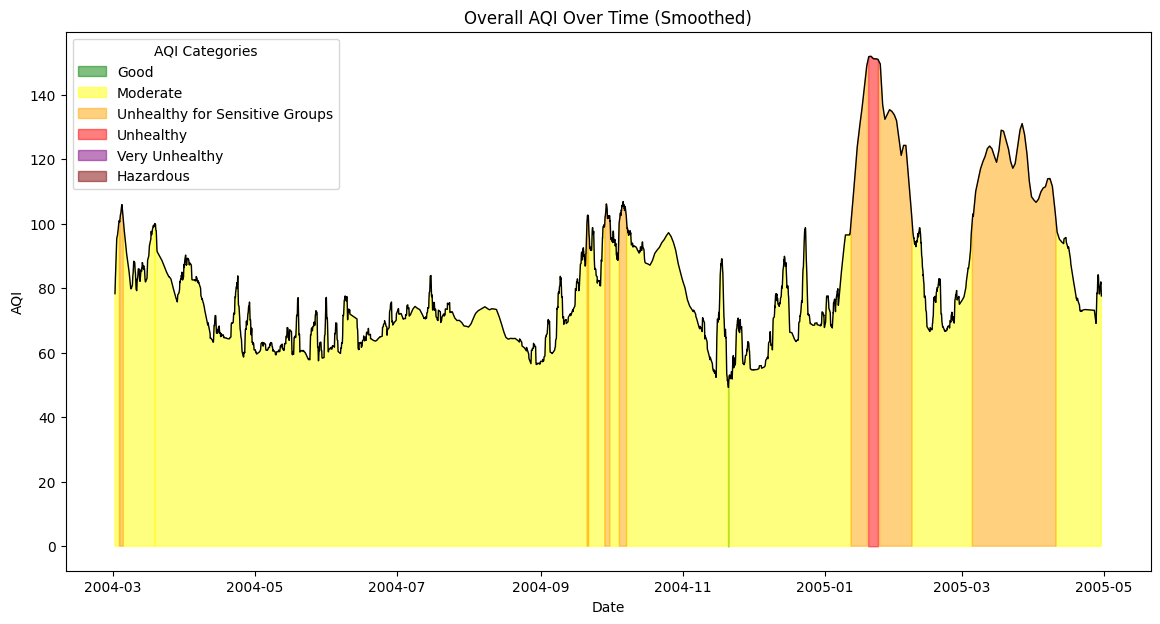

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'aqi_data' is your dataframe with the 'Start' and 'Overall_AQI' columns

# Apply a rolling average with a window of, for example, 24 hours (adjust as needed)
aqi_data['Overall_AQI_Smoothed'] = aqi_data['Overall_AQI'].rolling(window=24).mean()

# Define the AQI categories and their colors
aqi_categories = [
    (0, 50, 'green', 'Good'),
    (51, 100, 'yellow', 'Moderate'),
    (101, 150, 'orange', 'Unhealthy for Sensitive Groups'),
    (151, 200, 'red', 'Unhealthy'),
    (201, 300, 'purple', 'Very Unhealthy'),
    (301, 500, 'maroon', 'Hazardous')
]

# Create the plot
plt.figure(figsize=(14, 7))

# Plot each AQI category with its corresponding color
for lower, upper, color, label in aqi_categories:
    plt.fill_between(aqi_data['Start'],
                     aqi_data['Overall_AQI_Smoothed'],
                     where=(aqi_data['Overall_AQI_Smoothed'] >= lower) & (aqi_data['Overall_AQI_Smoothed'] <= upper),
                     color=color,
                     label=label,
                     alpha=0.5)

# Plot the overall AQI line
plt.plot(aqi_data['Start'], aqi_data['Overall_AQI_Smoothed'], color='black', linewidth=1)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall AQI Over Time (Smoothed)')
plt.legend(title='AQI Categories')

# Show the plot
plt.show()


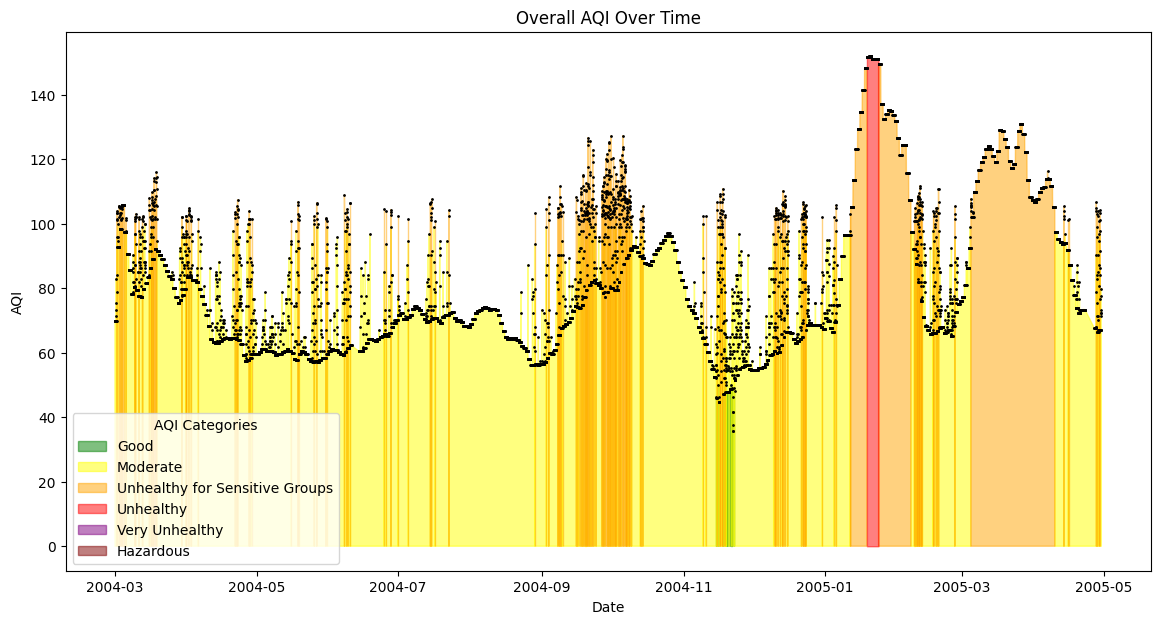

In [135]:

# Assuming 'aqi_data' is your dataframe with the 'Start' and 'Overall_AQI' columns

# Define the AQI categories and their colors
aqi_categories = [
    (0, 50, 'green', 'Good'),
    (51, 100, 'yellow', 'Moderate'),
    (101, 150, 'orange', 'Unhealthy for Sensitive Groups'),
    (151, 200, 'red', 'Unhealthy'),
    (201, 300, 'purple', 'Very Unhealthy'),
    (301, 500, 'maroon', 'Hazardous')
]

# Create the plot
plt.figure(figsize=(14, 7))

# Plot each AQI category with its corresponding color
for lower, upper, color, label in aqi_categories:
    plt.fill_between(aqi_data['Start'],
                     aqi_data['Overall_AQI'],
                     where=(aqi_data['Overall_AQI'] >= lower) & (aqi_data['Overall_AQI'] <= upper),
                     color=color,
                     label=label,
                     alpha=0.5)

# Plot the overall AQI points
plt.scatter(aqi_data['Start'], aqi_data['Overall_AQI'], color='black', s=1)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall AQI Over Time')
plt.legend(title='AQI Categories')

# Show the plot
plt.show()

##Predicted Oxides

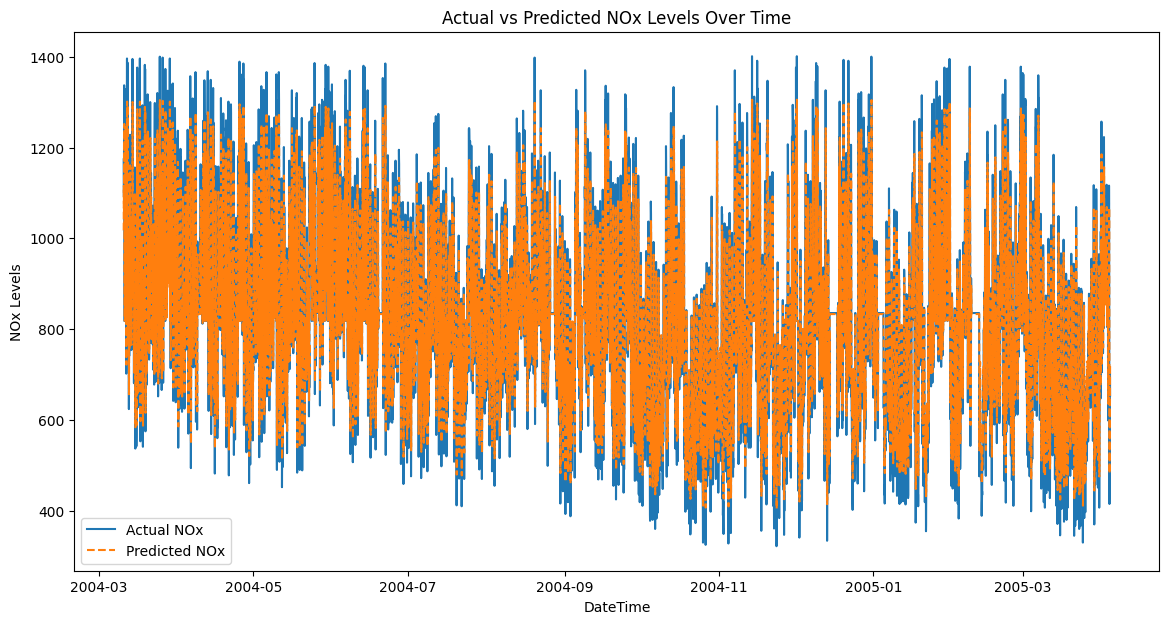

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

file_path = '/content/drive/My Drive/Colab Notebooks/milan_oxides.csv'

data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create a new column for the NOx values shifted by one timestep
data['NOx_lagged'] = data['PT08.S3(NOx)'].shift(1)

# Drop the first row with NaN value in NOx_lagged
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data['NOx_lagged'].values.reshape(-1, 1)
y = data['PT08.S3(NOx)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a DataFrame for the results
results = pd.DataFrame({
    'DateTime': data.index,
    'Actual_NOx': y,
    'Predicted_NOx': np.concatenate([y_pred_train, y_pred_test])
})

# Plot the actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(results['DateTime'], results['Actual_NOx'], label='Actual NOx')
plt.plot(results['DateTime'], results['Predicted_NOx'], label='Predicted NOx', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('NOx Levels')
plt.title('Actual vs Predicted NOx Levels Over Time')
plt.legend()
plt.show()

In [180]:
results

,DateTime,Actual_NOx,Predicted_NOx
0,2004-03-10 19:00:00,1174.0,1017.251676
1,2004-03-10 20:00:00,1140.0,1115.744511
2,2004-03-10 21:00:00,1092.0,1087.365220
3,2004-03-10 22:00:00,1205.0,1047.300338
4,2004-03-10 23:00:00,1337.0,1141.619747
...,...,...,...
9351,2005-04-04 10:00:00,539.0,559.009589
9352,2005-04-04 11:00:00,604.0,585.719510
9353,2005-04-04 12:00:00,603.0,639.974038
9354,2005-04-04 13:00:00,702.0,639.139353


##Developing AQI+

In [141]:
file_path = '/content/drive/My Drive/Colab Notebooks/milan_oxides.csv'
oxides_data = pd.read_csv(file_path)

In [149]:
oxides_data.rename(columns={'DateTime': 'Start'}, inplace=True)


In [160]:
# Convert the 'Start' column to datetime in oxides data
oxides_data['Start'] = pd.to_datetime(oxides_data['Start'])

# Convert the 'Start' column to datetime in AQI data
aqi_data['Start'] = pd.to_datetime(aqi_data['Start'])

In [161]:
start_date = '2004-03-10 18:00:00' #from oxides data
end_date = '2005-04-04 14:00:00'

# Filter the AQI data to only include rows within the specified time range
filtered_aqi_data = aqi_data[(aqi_data['Start'] >= start_date) & (aqi_data['Start'] <= end_date)]

In [178]:
# Merge the filtered AQI data with the oxides data
combined_data = pd.merge(filtered_aqi_data, oxides_data, on='Start', how='inner')

# Display the first few rows of the combined data
combined_data.tail()

,Start,8hr_avg,AQI_CO,Value,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Season
9280,2005-04-04 10:00:00,1.1875,13.494318,127.0,105.918919,4.166667,60.713384,111.054439,11.428571,111.054439,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,spring
9281,2005-04-04 11:00:00,1.2000,13.636364,106.0,101.945946,4.918981,60.713384,111.054439,14.285714,111.054439,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,spring
9282,2005-04-04 12:00:00,1.2125,13.778409,97.0,96.804348,6.886574,60.713384,111.054439,15.714286,111.054439,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,spring
9283,2005-04-04 13:00:00,1.2125,13.778409,89.0,88.282609,9.837963,60.713384,111.054439,15.714286,111.054439,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,spring
9284,2005-04-04 14:00:00,1.1875,13.494318,81.0,79.760870,13.946759,60.713384,111.054439,12.857143,111.054439,1071.0,1047.0,654.0,1129.0,816.0,28.5,13.1,0.5028,spring


In [171]:
# List of columns to keep
columns_to_keep = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Overall_AQI']

# Select only the columns to keep
prepared_data = combined_data[columns_to_keep]

# Display the first few rows of the prepared data
prepared_data.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Overall_AQI
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,85.086957
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,85.086957
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,79.390558
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,79.390558
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,79.390558
